# **'Project 1 Healthcare': Exploratory Data Analisys**

1.1 Importeer librairies <br>

In [73]:
import sqlite3
import pandas as pd 
import numpy as np
import json
import csv
import requests
import seaborn as sns
import matplotlib.pyplot as plt


## Collection

**Data ophalen met een SQLite query:**

**Rest API**

**CSV bestand**

In [74]:
df = pd.read_csv('./data/data_dinsdag.csv')

1.2.1 Check if it worked

In [75]:
df.head()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,73.9,185,99.7,0.9,0.0,2.4,6.9,73.1
1,86.0,172,105.4,1.8,8.1,0.4,4.2,85.0
2,83.3,176,111.4,1.1,0.8,4.6,7.5,81.6
3,82.8,164,111.4,4.7,11.8,1.0,2.9,81.0
4,78.7,178,71.6,1.5,8.3,4.9,5.5,75.0


In [76]:
df.tail()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
4091,80.3,176,115.9,3.7,0.1,5.6,5.8,80.7
4092,75.3,162,129.6,3.6,6.2,5.6,7.6,71.1
4093,93.1,189,115.3,2.7,9.4,4.9,6.6,90.0
4094,77.9,170,90.8,2.3,13.2,0.8,6.2,75.9
4095,101.3,188,129.2,1.2,8.2,6.0,6.2,96.9


## **Preprocessing**

 **Inzichten preprocessing** <br>

1. De dataset bevat 4096 rijen en 8 kolommen
2. 2 kolommen hebben dtype float64, de overige 6 hebben dtype object
3. De functies .head() en .tail() maken inzichtelijk dat de dataset gevuld is met uitsluitend numerieke waarden
4. Via .info[Non-null Count] wordt duidelijk dat er geen 0 waarden in de rijen staan
5. De functie .describe() geeft een relatief groot aantal NaN's terug

**Conclusie**
1. Er zijn cellen die onjuiste waarden bevatten, deze waarden zijn niet numeriek.

**Vervolgstappen**
1. Onderzoek hoeveel onjuiste waardes er zijn
2. Onderzoek waar de onjuiste waardes zijn 
3. Bepaal wat je met de waardes gaat doen > Als het er minder dan 20 zijn verwijderen anders overleggen. <br>

**Pseudocode**

1. Itereer over kolommen heen
2. Filter de onjuiste waarde
3. Stop deze waarde in een lijst
6. Verwijder

In [77]:
# 1.3
# Eerst checken of er waarden zijn die missen. 
df.isna().sum()

genetic     0
length      0
mass        0
exercise    0
smoking     0
alcohol     0
sugar       0
lifespan    0
dtype: int64

1.3 Check if data contains errors / defaults

In [78]:
# 1.3
df.info() # 6 col have dtype object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4096 non-null   object 
 1   length    4096 non-null   object 
 2   mass      4096 non-null   object 
 3   exercise  4096 non-null   object 
 4   smoking   4096 non-null   float64
 5   alcohol   4096 non-null   object 
 6   sugar     4096 non-null   object 
 7   lifespan  4096 non-null   float64
dtypes: float64(2), object(6)
memory usage: 256.1+ KB


In [79]:
# Zoek uit wat voor niet numerieke data er in zit

# Ik was de waarden oplopend sorteren zodat bovenaan de niet numerieke waarden komen te staan. Dit is geen mooie manier maar het eerste waar ik nu op kom.

df.sort_values(by='length', ascending=False)

# 11 x ? voor genetic; 3x  undefined voor length; 2 x ? mass; 1 x ? exercise; 2 x ? alcohol; 1 x ?



,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
1861,76.7,undefined,115.9,1.1,4.8,3.1,2.9,74.4
1038,81.5,undefined,100.2,2.5,8.9,1.3,7.9,81.2
3043,66.7,undefined,74.0,2.4,0.1,2.0,10.5,67.6
1365,86.5,214,107.5,0.7,6.6,2.8,12.2,85.1
1241,80.0,214,108.9,4.2,2.3,2.7,10.8,80.8
...,...,...,...,...,...,...,...,...
3540,80.1,155,101.9,0.4,19.3,2.1,10.5,72.6
1948,89.6,154,101.6,1.9,7.3,2.5,7.8,86.6
1684,86.2,154,96.1,2.0,9.3,0.9,10.8,83.0
3842,85.0,154,120.8,1.2,20.0,0.1,5.3,76.2


In [80]:
# Itereer over kolommen heen
# Filter de onjuiste waarde
# Verwijder

for c in df.columns: # de loop
    df[c] = pd.to_numeric(df[c], errors = 'coerce') # de code # to list
    
pd.isna(np.nan) # Check of niet numerieke waarde gewijzigd zijn naar NaN, als dat zo is True


True

In [81]:
df.info() #dubbelcheck of alle kolommen nu een numeriek Dtype hebben

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4095 non-null   float64
 1   length    4093 non-null   float64
 2   mass      4094 non-null   float64
 3   exercise  4095 non-null   float64
 4   smoking   4096 non-null   float64
 5   alcohol   4094 non-null   float64
 6   sugar     4095 non-null   float64
 7   lifespan  4096 non-null   float64
dtypes: float64(8)
memory usage: 256.1 KB


In [82]:
df.isna().any(axis=1).sum() # er zijn precies 10 foutieve waarden, op een dataset van 4096 rijen kan het verwijderen van 10 rijen zonder dat dit impact heeft.

10

In [83]:
a = df.isna() 
b = a.any()
print(b)

genetic      True
length       True
mass         True
exercise     True
smoking     False
alcohol      True
sugar        True
lifespan    False
dtype: bool


In [84]:
a = df.isna().any(axis=1) #zichtbaar maken waar de gemiste waardes zijn
df[a]

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
947,82.0,193.0,68.0,1.3,17.2,NaN,1.2,75.3
1038,81.5,NaN,100.2,2.5,8.9,1.3,7.9,81.2
1861,76.7,NaN,115.9,1.1,4.8,3.1,2.9,74.4
2354,74.8,183.0,123.2,2.3,13.8,NaN,8.1,70.4
2576,76.4,174.0,90.9,NaN,21.7,0.4,3.7,71.0
2721,88.9,179.0,NaN,3.1,0.2,0.5,5.1,91.5
2793,78.0,178.0,71.9,1.3,0.1,4.1,NaN,77.4
3043,66.7,NaN,74.0,2.4,0.1,2.0,10.5,67.6
3398,NaN,204.0,72.0,1.0,9.9,0.4,5.4,83.0
4027,67.3,180.0,NaN,1.6,0.0,0.4,5.3,67.9


In [85]:
df.isna().sum().sort_values(ascending=False) # Waar missen de meeste waarde?

length      3
mass        2
alcohol     2
genetic     1
exercise    1
sugar       1
smoking     0
lifespan    0
dtype: int64

In [86]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)

<AxesSubplot: >

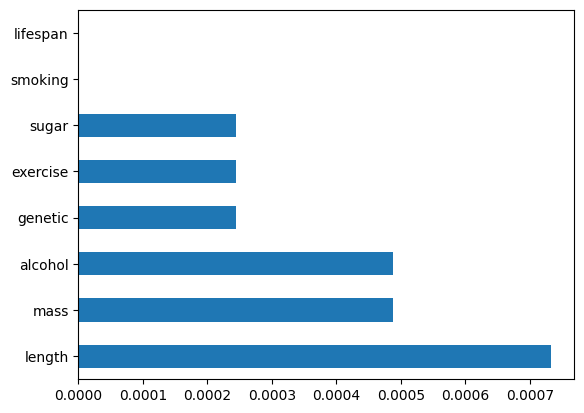

In [87]:
missing_percentages.plot(kind='barh')

In [88]:
df= df.dropna() # verwijderen en checken of het gelukt is.

In [89]:
df.isna().sum()

genetic     0
length      0
mass        0
exercise    0
smoking     0
alcohol     0
sugar       0
lifespan    0
dtype: int64

In [90]:
# Verder exploreren.

In [91]:
df.describe()

# Lifespan van -1 als min


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000
mean,82.280127,183.879344,92.273837,2.403353,9.812677,2.266006,6.484973,80.137959
std,7.440070,12.627470,25.800771,1.170593,6.919057,1.801020,2.709868,8.041656
min,63.900000,154.000000,50.000000,0.100000,0.000000,0.000000,0.700000,-1.000000
25%,77.600000,175.000000,71.425000,1.500000,3.400000,0.600000,4.400000,75.000000
50%,81.800000,184.000000,89.500000,2.200000,9.500000,1.700000,6.300000,79.700000
75%,86.700000,193.000000,110.875000,3.200000,15.900000,4.000000,8.400000,85.200000
max,102.200000,214.000000,163.600000,5.500000,22.200000,6.000000,13.800000,105.100000


## **Data selection**

**Inzichten dataselectie**

1. 

<AxesSubplot: xlabel='lifespan'>

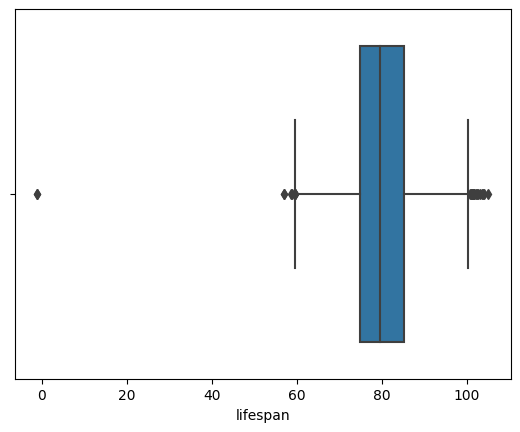

In [92]:
sns.boxplot(x=df['lifespan'])

In [93]:
#We zien de outliers ook terug op de boxplot. Dit zegt ons echter niets over het aantal -1 waardes. Dit checken we dus:
df.loc[df['lifespan'] < 0]

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
889,88.1,156.0,112.9,0.7,19.5,0.9,3.0,-1.0
2300,82.6,188.0,63.1,3.6,15.0,0.2,1.0,-1.0


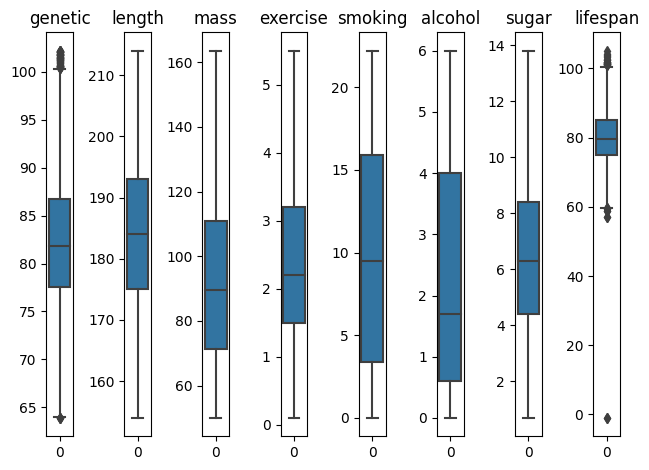

In [94]:
cols = [c for c in df.columns]

fig, axes = plt.subplots(ncols=len(cols))

for column, axis in zip(cols, axes):
        sns.boxplot(data=df[column], ax=axis) 
        axis.set_title(column)
        
plt.tight_layout()
plt.show()

In [95]:

# Outliers verwijderen

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

remove_outliers(df,['lifespan'],6)

Working on column: lifespan


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,73.9,185.0,99.7,0.9,0.0,2.4,6.9,73.1
1,86.0,172.0,105.4,1.8,8.1,0.4,4.2,85.0
2,83.3,176.0,111.4,1.1,0.8,4.6,7.5,81.6
3,82.8,164.0,111.4,4.7,11.8,1.0,2.9,81.0
4,78.7,178.0,71.6,1.5,8.3,4.9,5.5,75.0
...,...,...,...,...,...,...,...,...
4091,80.3,176.0,115.9,3.7,0.1,5.6,5.8,80.7
4092,75.3,162.0,129.6,3.6,6.2,5.6,7.6,71.1
4093,93.1,189.0,115.3,2.7,9.4,4.9,6.6,90.0
4094,77.9,170.0,90.8,2.3,13.2,0.8,6.2,75.9


<AxesSubplot: >

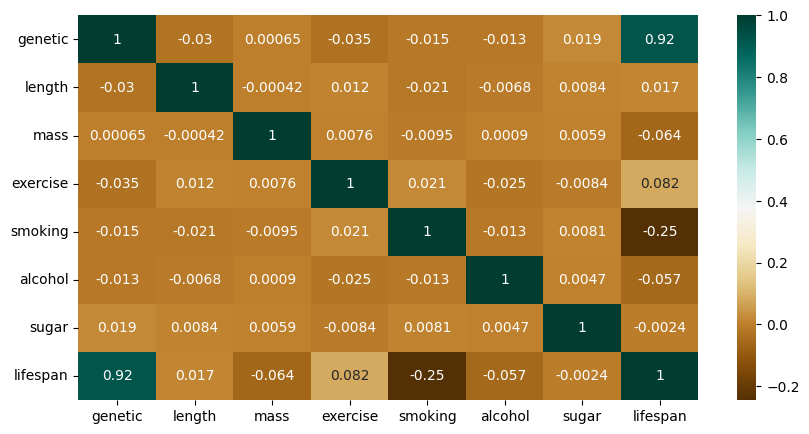

In [96]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
#

1. **Genetic en lifespan**: Zeer hoge correlatie. 
2. **Length en lifespan**: Zeer lage correlatie
3. **Mass en lifespan**: Negatieve correlatie
4. **Exercise en lifespan**: Lage correlatie
5. **Smoking en lifespan**: Negatieve correlatie
6. **Alcohol en lifespan**: Negatieve correlatie
7. **Sugar en lifespan**: Negatieve correlatie

Vervolgstappen <br>
Ik ben benieuwd naar een model waarbij alleen wordt gekeken naar iemands lifestyle (exercise, smoking, alcohol, sugar) <br>
Ik hoor in de klas dat er verdeelde meningen zijn over genetics, dus ik ga ook kijken naar een model waar genetics niet bij zitten <br>
Ik ben ook benieuwd


array([[<AxesSubplot: title={'center': 'genetic'}>,
        <AxesSubplot: title={'center': 'length'}>,
        <AxesSubplot: title={'center': 'mass'}>],
       [<AxesSubplot: title={'center': 'exercise'}>,
        <AxesSubplot: title={'center': 'smoking'}>,
        <AxesSubplot: title={'center': 'alcohol'}>],
       [<AxesSubplot: title={'center': 'sugar'}>,
        <AxesSubplot: title={'center': 'lifespan'}>, <AxesSubplot: >]],
      dtype=object)

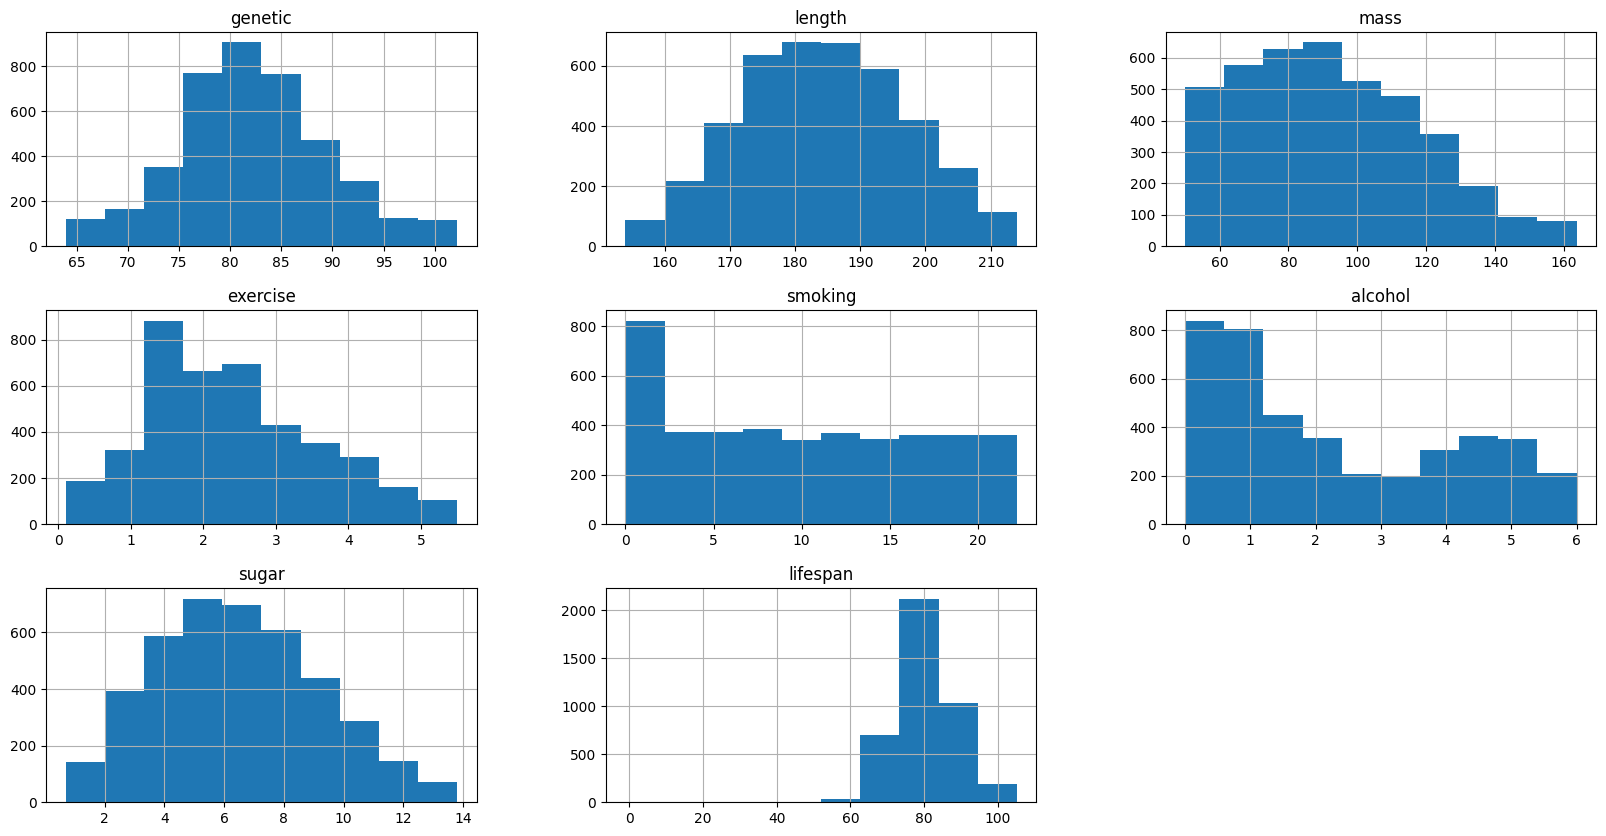

In [97]:
df.hist(figsize=(20,10))

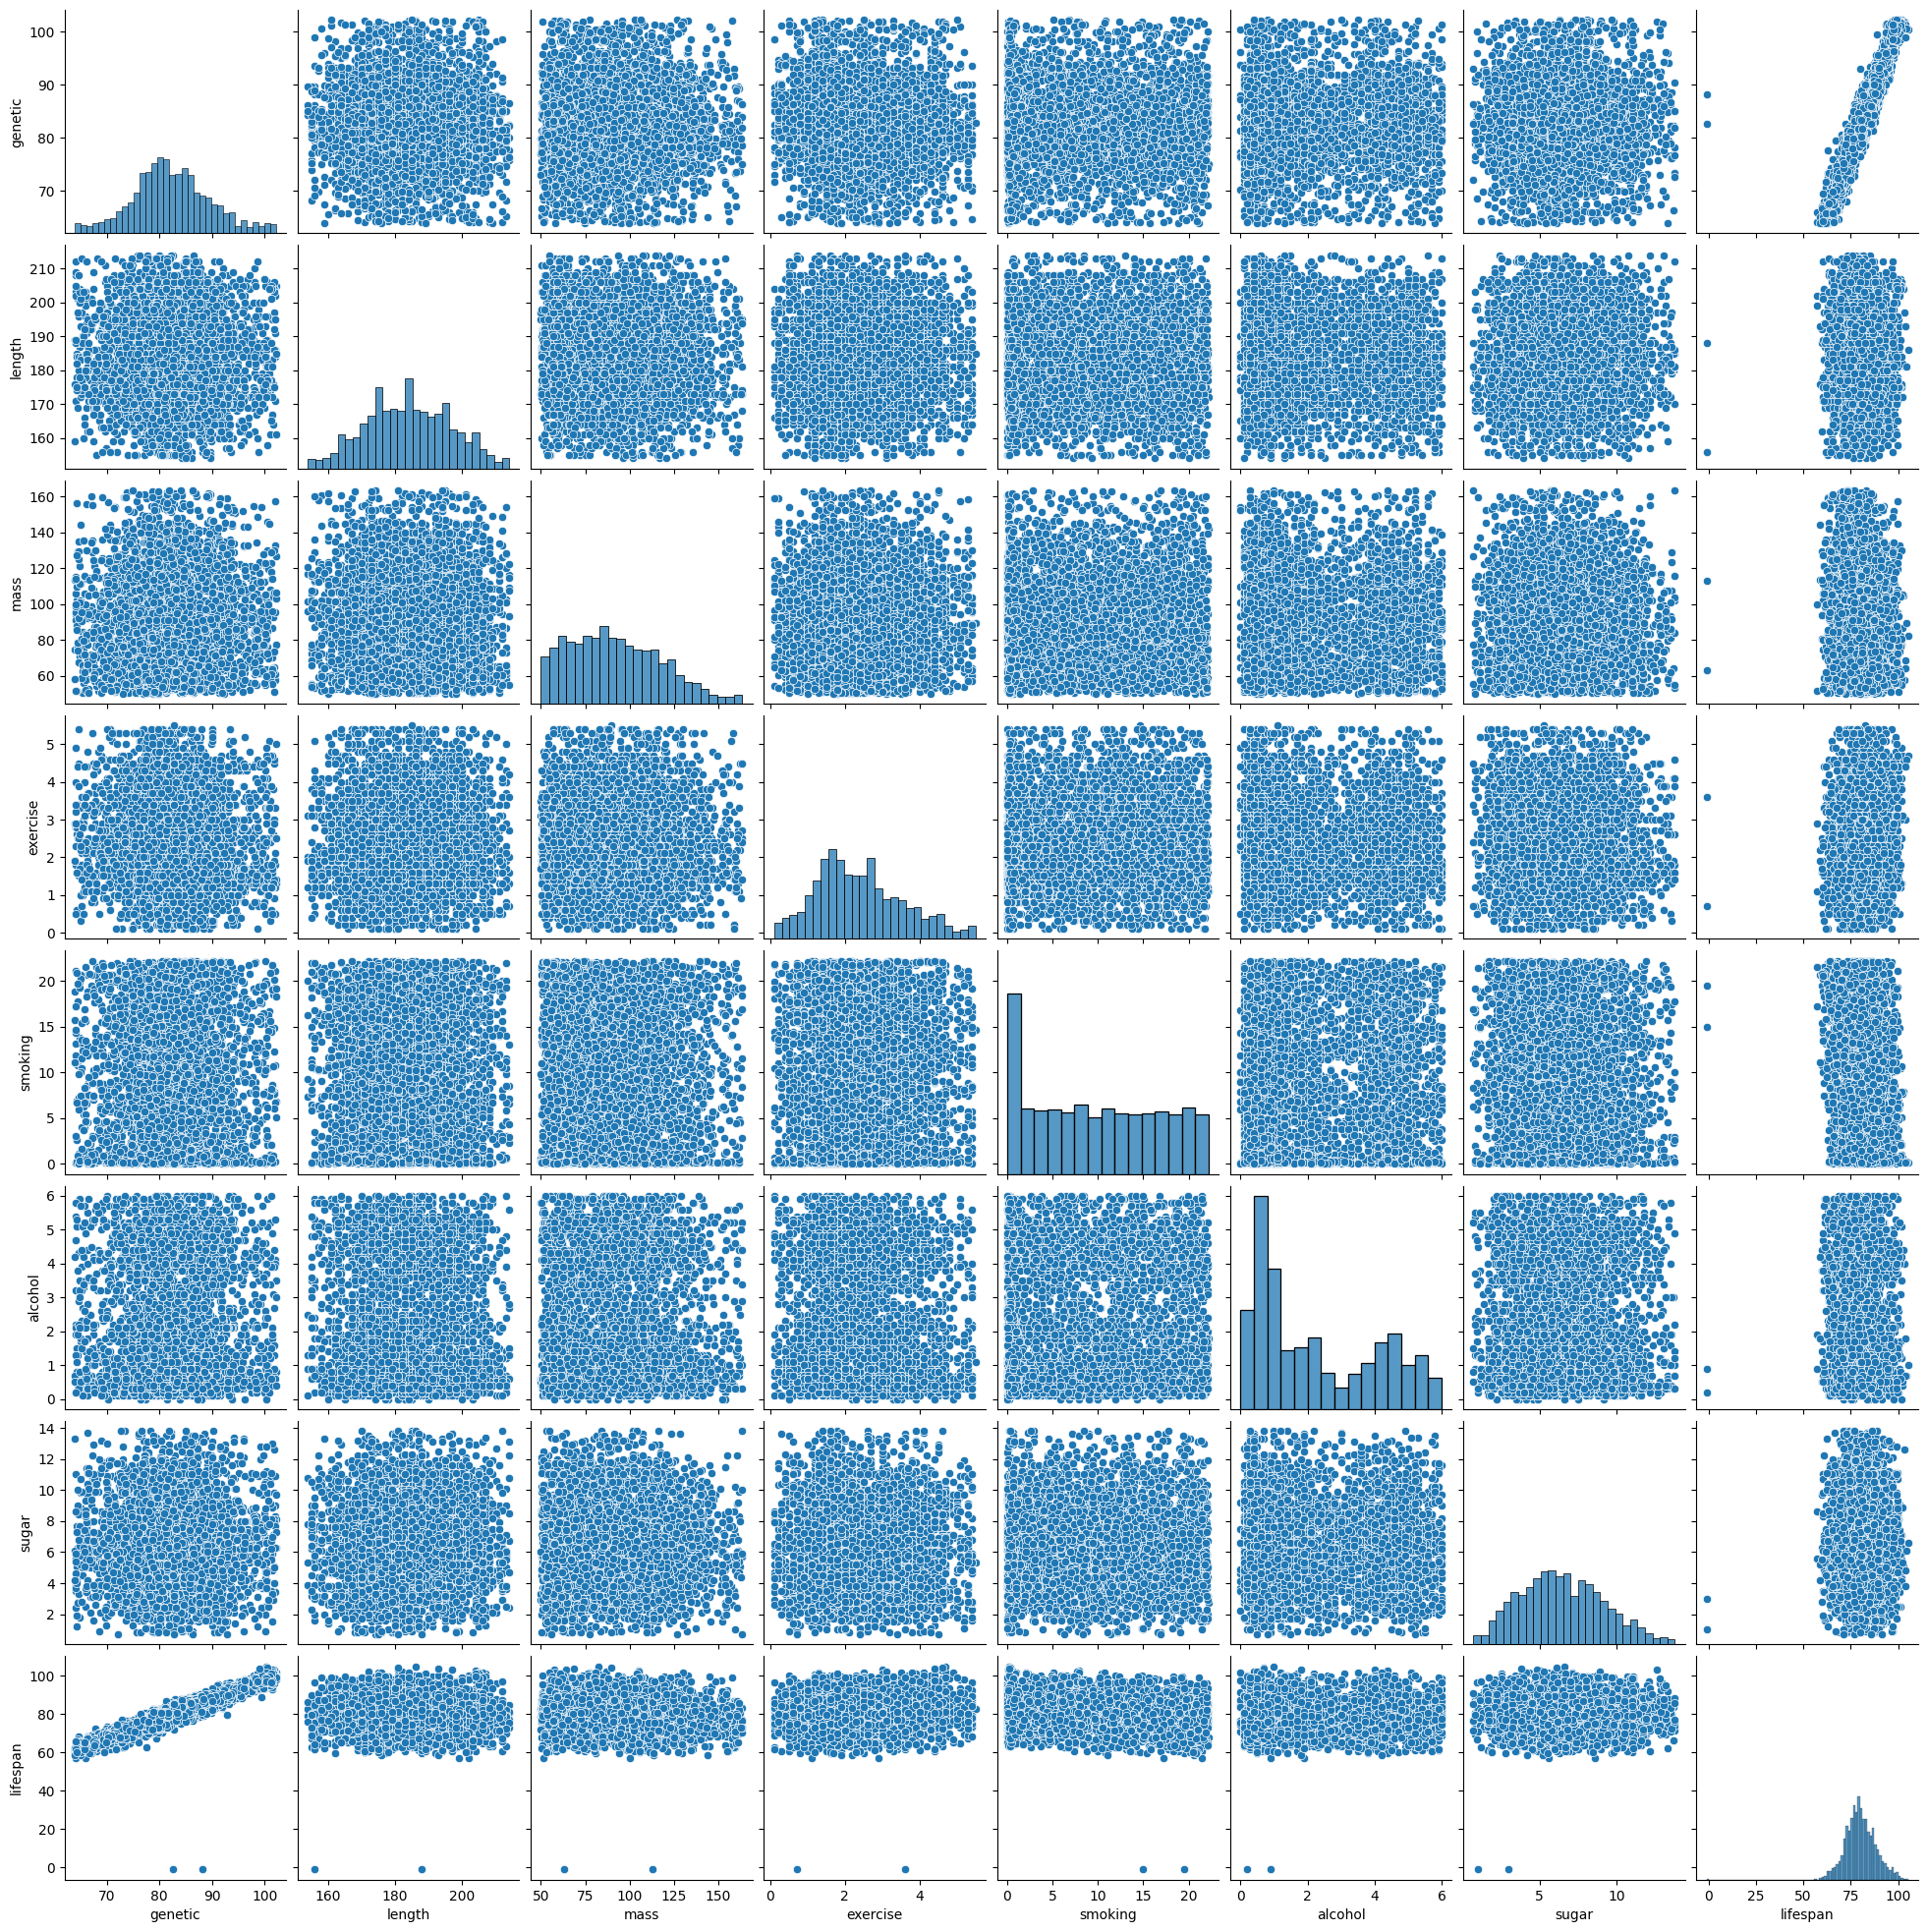

In [98]:
sns.pairplot(df)

In [99]:
# Vragen
# Welke bevolkingsgroep? grote mensen, veel roken, worden erg oud (gem 80)
# Mogelijke clusters:
# exercise (veel-weinig) (boolean)

In [100]:
# dendogram clusters bmi

## **Feature extraction**

In [101]:
#We berekenen de bmi volgens de standaard formule:
col_bmi = (df.mass/(df.length/100)**2)

#We kijken naar de nieuwe kolom


In [102]:
# Nieuw dataframe creeren door deze kolom toe te voegen aan de originele dataset en vervolgens op te slaan onder nieuwe variabele naam. Lengte en gewicht gaan eruit.

#pseudo code
# creeer een nieuwe variabele
# verwijder de kolommen met een pd functie
# voeg de nieuwe col toe met een pd functie


df_bmi = df.drop(['length', 'mass'], axis=1)
df_bmi['bmi'] = col_bmi

df_bmi.head()

#df_bmi = df.drop(['BMI cat'], axis=1)

df_bmi.head()

,genetic,exercise,smoking,alcohol,sugar,lifespan,bmi
0,73.9,0.9,0.0,2.4,6.9,73.1,29.130752
1,86.0,1.8,8.1,0.4,4.2,85.0,35.627366
2,83.3,1.1,0.8,4.6,7.5,81.6,35.963326
3,82.8,4.7,11.8,1.0,2.9,81.0,41.418798
4,78.7,1.5,8.3,4.9,5.5,75.0,22.598157


In [103]:
# Dataframe lifestyle

In [104]:
df_lifestyle = df.drop(['length', 'mass', 'genetic'], axis=1)

In [105]:
df_lifestyle = df[['exercise', 'smoking', 'alcohol', 'sugar', 'lifespan']]

df_lifestyle.head()

,exercise,smoking,alcohol,sugar,lifespan
0,0.9,0.0,2.4,6.9,73.1
1,1.8,8.1,0.4,4.2,85.0
2,1.1,0.8,4.6,7.5,81.6
3,4.7,11.8,1.0,2.9,81.0
4,1.5,8.3,4.9,5.5,75.0


In [106]:
df_not_genetic = df.drop(['genetic'], axis = 1)
df_ng = df_not_genetic

df_ng.head()

,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,185.0,99.7,0.9,0.0,2.4,6.9,73.1
1,172.0,105.4,1.8,8.1,0.4,4.2,85.0
2,176.0,111.4,1.1,0.8,4.6,7.5,81.6
3,164.0,111.4,4.7,11.8,1.0,2.9,81.0
4,178.0,71.6,1.5,8.3,4.9,5.5,75.0


In [107]:
df.to_csv(index=False)
df_lifestyle.to_csv('df_lifestyle.csv', index=False)


In [108]:
df_not_genetic.to_csv('df_ng.csv',index=False)
df_bmi.to_csv('df_bmi.csv', index=False)

In [109]:

import sqlite3
dbName = 'C:/Users/31641/MakeAIWork/Project/Data/db_final.sq3lite'
tableName = 'rest_api_netifly'

dbConnection = sqlite3.connect(dbName)

df = df.to_sql(tableName,dbName, sqlite3.Connection)
df_lifestyle = df_lifestyle.to_sql(tableName, dbName, sqlite3.Connection)
df_ng.to_sql(tableName, dbName, sqlite3.Connection)

ArgumentError: Could not parse SQLAlchemy URL from string 'C:/Users/31641/MakeAIWork/Project/Data/db_final.sq3lite'

In [ ]:

import sqlite3
dbName = "rest_server/medisch_centrum_randstad/db.sqlite3"
tableName = "rest_api_netlify"

dbConnection = sqlite3.connect(dbName)

df.to_sql(tableName,dbName, sqlite3.Connection)
#df_lifestyle = df_lifestyle.to_sql(tableName, dbName, sqlite3.Connection)
#df_ng.to_sql(tableName, dbName, sqlite3.Connection)

In [ ]:
# Nog interessant om te checken
# nicotine gehalte in bloed op basis van gerookte sigaretten